Streaming data dan data preprocessing Kelompok 5 PDB

12S18002 : Wiranda Siahaan

12S18009 : Novita Enjelia Hutapea

12S18041 : Merika H. Manurung

12S18046 : Tiara Octavia Situmorang

# Consume twitter steaming data

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import socket
import json
import numpy as np
import pandas as pd

In [3]:
#Kindly put your credentials received from twitter developer account
consumer_key='2mTmxHwkZramjVDOewE2dybgQ'
consumer_secret='dJ42E93prTAze5BoF4wAIcxYA6gXfu9rGrHr6gguUt85xcHJSi'
access_token ='1517128047019040768-YMZCcFIf6VLbZXNkJsa79sZk70xFkM'
access_secret='Auwa9WPIktjUCrgQmzceZsdMtMA2hbnebSR7QlmYEdrlq'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [5]:
for tweet in api.search(q='miniso', lan='en'):    
    print(tweet.text)

@erinajajan barangkali minat pc miniso figure aku ada yaak
RT @ohmybeautybank: [bb] pap tangan kalian yg pake kutek atau rekomendasiin warna kutek yg bagus dong guys 

me: miniso https://t.co/7kYtk4…
Erisell! WTS aab EXO
✅ MINISO FIGURE CHANYEOL
✅ INNERSLEEVE SULTAN UNTUK PC EXO

GOOD CONTIDION FOR ALL

semuanya… https://t.co/P0HQYnlKVu
@erinajajan Saya ada figure miniso chanyeol fullset dm aja kak bisa shopii include packing dan free biaya admin ( wts )
🎀 พร้อมส่ง 🎀
ตุ๊กตาจาก miniso ตามรูปเลยค่ะ เค้าจำชื่อน้องไม่ได้ 🥹 น้องยังใหม่มาก ๆ

💭 price : 50 บาทรวมส่ง 💭… https://t.co/43Ejfw7WZp
aku mau ke miniso beli kipas grgr wisuda doang si wkwk
La firma Miniso sigue expandiéndose por el mercado nacional, el próximo 15 de junio el grupo económico abrirá su ti… https://t.co/sotGHnB9RL
@aiiixsa_013 Miniso?
Miniso set mouse &amp; keyboard wireless

Link: https://t.co/aJ2Ji2SbMv https://t.co/0InkrpdjVm
RT @CuteBarang: ✨Recommended farfum brand MINISO✨ 

A thread https://t.co/XkaFCLtHN7
@ohmybeau

In [6]:
tweetDf = pd.DataFrame(columns = ['User', 'User_statuses_count', 
                             'user_followers','fav_count','User_location','Tweets',])

In [7]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100000, lang='en').items():
        print(i, end='\r')
        tweetDf.loc[i, 'User'] = tweet.user.name
        tweetDf.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        tweetDf.loc[i, 'user_followers'] = tweet.user.followers_count
        tweetDf.loc[i, 'fav_count'] = tweet.favorite_count
        tweetDf.loc[i, 'User_location'] = tweet.user.location
        tweetDf.loc[i, 'Tweets'] = tweet.text
        
        
        tweetDf.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 200:
            break
        else:
            pass

In [8]:
stream(data = ['miniso'], file_name = 'miniso_2021')

In [9]:
tweetDf.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,Shopee Aesthetic ✨,822,823,0,Shopee,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,Namrun,701,5,0,,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,h3lluh,8878,247,0,/ svt / atz / nct / en- /,"RT @guillerhomo: ""people don't read anymore"" a..."
3,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @kwanthinkers: ‘this bag is 2x more expensi...


## Data Preprocessing

In [10]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [11]:
dataset = pd.read_csv('miniso_2021.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [12]:
dataset.head()

,Unnamed: 0,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,0,Shopee Aesthetic ✨,822,823,0,Shopee,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,1,Namrun,701,5,0,NaN,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,2,h3lluh,8878,247,0,/ svt / atz / nct / en- /,"RT @guillerhomo: ""people don't read anymore"" a..."
3,3,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,4,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @kwanthinkers: ‘this bag is 2x more expensi...


In [13]:
print(dataset.shape)

(200, 7)


### drop coloumn

In [14]:
to_drop = ['Unnamed: 0', 'User', 'User_statuses_count', 'user_followers', 'fav_count', 'User_location']

In [15]:
dataset.drop(to_drop, inplace=True, axis = 1)

In [16]:
dataset.head()

,Tweets
0,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,"RT @guillerhomo: ""people don't read anymore"" a..."
3,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,RT @kwanthinkers: ‘this bag is 2x more expensi...


In [17]:
print(dataset.shape)

(200, 1)


### missing value

In [18]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
dataset1 = dataset.dropna()
print(dataset1.shape)

(200, 1)


# Text Preprocessing



In [19]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

## Case folding

In [20]:
# Change text column to lower lower case
dataset1['Tweets'] = dataset1['Tweets'].str.lower()

# Look at the change
print(dataset1)

                                                Tweets
0    miniso set mouse &amp; keyboard wireless\n\nli...
1    rt @cutebarang: ✨recommended farfum brand mini...
2    rt @guillerhomo: "people don't read anymore" a...
3    rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4    rt @kwanthinkers: ‘this bag is 2x more expensi...
..                                                 ...
195  not me happy because of miniso https://t.co/ye...
196            my miniso addiction is coming back soon
197  apparently only the miniso in lagos fell off. ...
198  @_khunby @_dammyb_ do u have other miniso prod...
199      awwwww a miniso date🥹 https://t.co/kxqxao6waw

[200 rows x 1 columns]


## Remove URL

In [21]:
def clean_data(dataset2):
#replace URL of a text
    dataset1['Tweets'] = dataset2['Tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(dataset1)
print(dataset1['Tweets']);

0      miniso set mouse &amp; keyboard wireless\n\nli...
1      rt @cutebarang: ✨recommended farfum brand mini...
2      rt @guillerhomo: "people don't read anymore" a...
3      rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4      rt @kwanthinkers: ‘this bag is 2x more expensi...
                             ...                        
195                     not me happy because of miniso  
196              my miniso addiction is coming back soon
197    apparently only the miniso in lagos fell off. ...
198    @_khunby @_dammyb_ do u have other miniso prod...
199                              awwwww a miniso date🥹  
Name: Tweets, Length: 200, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Number

In [22]:
# removing numbers from strings of speciafied 
# column, here 'Name'
dataset1['Tweets']= dataset1['Tweets'].str.replace('\d+', '')
  
# display output with numbers removed from 
# required strings
print(dataset1)

                                                Tweets
0    miniso set mouse &amp; keyboard wireless\n\nli...
1    rt @cutebarang: ✨recommended farfum brand mini...
2    rt @guillerhomo: "people don't read anymore" a...
3    rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4    rt @kwanthinkers: ‘this bag is x more expensiv...
..                                                 ...
195                   not me happy because of miniso  
196            my miniso addiction is coming back soon
197  apparently only the miniso in lagos fell off. ...
198  @_khunby @_dammyb_ do u have other miniso prod...
199                            awwwww a miniso date🥹  

[200 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Punctuation

In [23]:
dataset1['Tweets'] = dataset1['Tweets'].str.replace(r'[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [24]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text) 
    text = re.sub('\n+',' ',text)
    text = re.sub('\n', text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)


    return text

In [25]:
clean_data(dataset1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
print(dataset1)

                                                Tweets
0    miniso set mouse amp keyboard wireless\n\nlink...
1    rt cutebarang recommended farfum brand miniso ...
2    rt guillerhomo people dont read anymore ao was...
3    rt seokwoo_thinker they so cute \n\n원우 도겸 seve...
4    rt kwanthinkers this bag is x more expensive t...
..                                                 ...
195                   not me happy because of miniso  
196            my miniso addiction is coming back soon
197  apparently only the miniso in lagos fell off b...
198  _khunby _dammyb_ do u have other miniso produc...
199                             awwwww a miniso date  

[200 rows x 1 columns]


## Hasil Akhir

In [27]:
dataset1.to_csv('preprocessing_PDB.csv', index = False)

In [28]:
data = pd.read_csv('preprocessing_PDB.csv')

In [29]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score  < 0:
        return 'Negatif'
    elif score == 0:
        return 'Netral'
    else:
        return 'Positiv'

In [30]:
final_data = pd.DataFrame(data[['Tweets']])
final_data.head()

,Tweets
0,miniso set mouse amp keyboard wireless\n\nlink...
1,rt cutebarang recommended farfum brand miniso ...
2,rt guillerhomo people dont read anymore ao was...
3,rt seokwoo_thinker they so cute \n\n원우 도겸 seve...
4,rt kwanthinkers this bag is x more expensive t...


In [31]:
final_data['Subjectivity'] = final_data['Tweets'].apply(getSubjectivity)
final_data['Polarity'] =  final_data['Tweets'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,Tweets,Subjectivity,Polarity,TextBlob
0,miniso set mouse amp keyboard wireless\n\nlink...,0.000000,0.000000,Netral
1,rt cutebarang recommended farfum brand miniso ...,0.000000,0.000000,Netral
2,rt guillerhomo people dont read anymore ao was...,0.288889,-0.155556,Negatif
3,rt seokwoo_thinker they so cute \n\n원우 도겸 seve...,1.000000,0.500000,Positiv
4,rt kwanthinkers this bag is x more expensive t...,0.380000,0.182857,Positiv


In [32]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Netral     137
Positiv     41
Negatif     22
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce14287510>,
 [Text(-0.6039251066842912, 0.9193880929816134, 'Netral'),
  Text(0.2567899102558782, -1.0696069100332037, 'Positiv'),
  Text(1.2701890389445076, -0.45729618995266996, 'Negatif')],
 [Text(-0.3294136945550679, 0.5014844143536072, '68.5%'),
  Text(0.14006722377593356, -0.583421950927202, '20.5%'),
  Text(0.7997486541502454, -0.28792723071094034, '11.0%')])

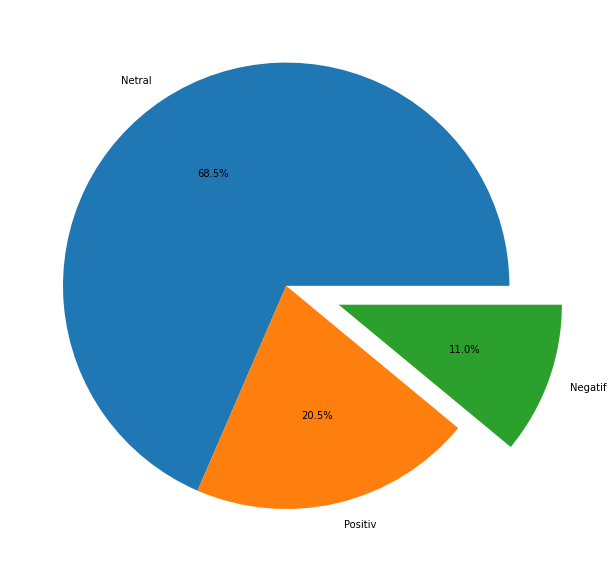

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [34]:
final_data.to_csv('dataprepro.csv', index = False)

## Analysist Using PySpark

Creating a spark session and importing the required libraries

In [35]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 198 kB 42.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=3fb4fd9ed4a0909b52c004c6d4809d48cad37379adf75014d9a46a8ebacad225
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [36]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as pyf
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [37]:
spark = SparkSession.builder.getOrCreate()

In [38]:
df = spark.read.csv('dataprepo.txt', sep='\t')

In [39]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)



In [40]:
new_df = df.withColumnRenamed('_c0', 'class').withColumnRenamed('_c1', 'text')

In [41]:
new_df.show(10)

+-------+--------------------+
|  class|                text|
+-------+--------------------+
|Positiv|amazonin really d...|
| Netral|why did i just fo...|
| Netral|ootdfess miniso nder|
| Netral|rt pajolicoe ashi...|
|Positiv|sehun miniso figu...|
| Netral|rt hunho wts  rea...|
|Positiv|funzobee miniso t...|
|Positiv|      miniso  heaven|
|Positiv|     diy sheet mask |
| Netral|miniso official p...|
+-------+--------------------+
only showing top 10 rows



## Clean and Prepare the Data

Creating a new text/twitter column contains the length of the text column

In [42]:
df_len = new_df.withColumn('length', pyf.length(pyf.col('text')))

In [43]:
df_len.show()

+-------+--------------------+------+
|  class|                text|length|
+-------+--------------------+------+
|Positiv|amazonin really d...|   114|
| Netral|why did i just fo...|    79|
| Netral|ootdfess miniso nder|    20|
| Netral|rt pajolicoe ashi...|   135|
|Positiv|sehun miniso figu...|    26|
| Netral|rt hunho wts  rea...|    23|
|Positiv|funzobee miniso t...|    32|
|Positiv|      miniso  heaven|    14|
|Positiv|     diy sheet mask |    16|
| Netral|miniso official p...|    55|
|Positiv|convomfs sunshine...|    32|
| Netral|      wts  ready ina|    14|
| Netral|the miniso in sj ...|    50|
|Positiv|ashinchina i have...|   115|
| Netral|monicaaatraaan br...|    41|
| Netral|rt acnlsugar i go...|   101|
| Netral|           sheetmask|     9|
| Netral|this boy was foll...|    97|
| Netral|really love this ...|   115|
| Netral|miniso official d...|    35|
+-------+--------------------+------+
only showing top 20 rows



Geting the average text length for each class

In [44]:
df_len.groupBy('class').agg(pyf.avg('length').alias('Avg. Length')).show()

+-------+-----------+
|  class|Avg. Length|
+-------+-----------+
|Positiv|    47.4875|
|Negatif|       55.0|
| Netral|      56.72|
+-------+-----------+



## Text Transformations

In this part I transform the raw text in to tf_idf model :

Performing the following steps to obtain TF-IDF:
1. Creating a Tokenizer from the text column.
2. Creating a StopWordsRemover to remove the stop words from the column obtained from the Tokenizer.
3. Creating a CountVectorizer after removing the stop words.
4. Creating the TF-IDF from the CountVectorizer.

In [45]:
tokenizer = Tokenizer(inputCol="text", outputCol="token_text")
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
count_vec = CountVectorizer(inputCol='stop_tokens',outputCol='c_vec')
idf = IDF(inputCol="c_vec", outputCol="tf_idf")

- Converting the class column to index using StringIndexer
- Creating text column from the TF-IDF and length columns.

In [46]:
labelnum = StringIndexer(inputCol='class',outputCol='label')
vecAssembler = VectorAssembler(inputCols=['tf_idf','length'],outputCol='features')

## The Model
- Creating a <b>NaiveBayes</b> classifier with the default parameters.

In [47]:
nbModel = NaiveBayes(featuresCol='features', labelCol='label')

## Pipeline
### Creating a pipeline model contains all the steps starting from the Tokenizer to the NaiveBays classifier.

In [48]:
pipeline = Pipeline(stages=[tokenizer,stopremove, count_vec, idf, labelnum, vecAssembler, nbModel])

### Spliting the data to train and test data with ratios 0.7 and 0.3 respectively.

In [49]:
trainDF, testDF = df_len.randomSplit([.7,.3],seed=42)

### Fitting your Pipeline model to the training data

In [50]:
pipelineModel = pipeline.fit(trainDF)

### Performing predictions on tests dataframe

In [51]:
predDF = pipelineModel.transform(testDF)

### Printing the schema of the prediction dataframe

In [52]:
predDF.printSchema()

root
 |-- class: string (nullable = true)
 |-- text: string (nullable = true)
 |-- length: integer (nullable = true)
 |-- token_text: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- stop_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- c_vec: vector (nullable = true)
 |-- tf_idf: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



## Model Evaluation
- Using <b>MulticlassClassificationEvaluator</b> to calculate the <b>f1_score</b>.

In [53]:
classificationEvaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='f1')

In [54]:
f1 = classificationEvaluator.evaluate(predDF)

In [55]:
print(f"f1_score is {f1}")

f1_score is 0.5961389961389961
